# Introduction

Data cleaning is something data scientists spend a lot of time on. The problem with teaching data cleaning is that the problems you will face are incredibly diverse. In this Notebook you will just see a few issues. Excellent (much better, to be honest) overviews can be found [here](https://realpython.com/python-data-cleaning-numpy-pandas/) or [here](https://www.tutorialspoint.com/python/python_data_cleansing.htm). This Notebook will contain most information you will need for the first Assignment, however.

Let's start with a common situation you might face: you have data that are distributed among two files. I'm using a selection from a data set on [Google Play apps](https://www.kaggle.com/lava18/google-play-store-apps/home). 

In [274]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np

df1 = pd.read_csv('steps.csv', delimiter=';')
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [276]:
df = pd.merge(df2, df1, on = 'id') #'app' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/anjavolkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight'>

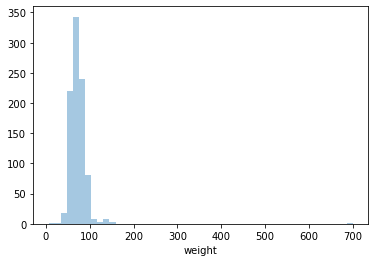

In [277]:
sns.distplot(df["weight"], kde=False) 

In [278]:
df = df[(df["weight"] < 200) & (df["weight"] > 35)]

<AxesSubplot:xlabel='weight'>

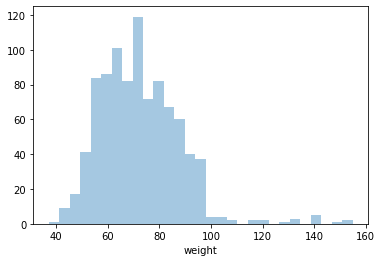

In [279]:
sns.distplot(df["weight"], kde=False) 

In [280]:
df.loc[:,'20-6-2013':"13-5-2014"].mean(axis=1)

0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
924     6282.131868
925     4799.880000
926    10030.326829
927    15679.679012
928     7584.467153
Length: 924, dtype: float64

In [281]:
df['mean'] = df.loc[:,'20-6-2013':"13-5-2014"].mean(axis=1)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


/Users/anjavolkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean'>

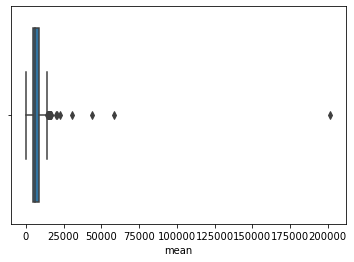

In [282]:
sns.boxplot(df["mean"]) 

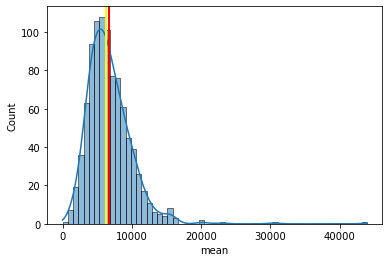

In [283]:
df = df[(df["mean"] < 50000)]
sns.histplot(df["mean"], kde=True) 
plt.axvline(x=df["mean"].median(),
            color='yellow', 
            lw=2)
plt.axvline(x=df["mean"].mean(),
            color='red', 
            lw=2)


In [284]:
df["mean"].mean()

6753.350655461147

In [285]:
np.var(df["mean"])

10666475.597342331

The distribution is normal, right skewed, has a few outliers on the right side. 

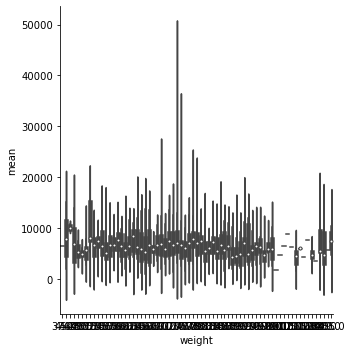

In [286]:
sns.catplot(x="weight", y="mean", kind="violin", data=df)
plt.show()

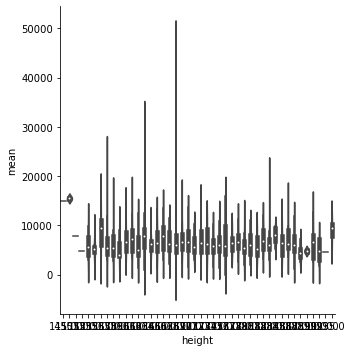

In [287]:
sns.catplot(x="height", y="mean", kind="violin", data=df)
plt.show()

In [288]:
def BMI(df):
    return (df['weight'] / df['height']**2)*10000
 
df['bmi'] = df.apply(BMI, axis=1)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


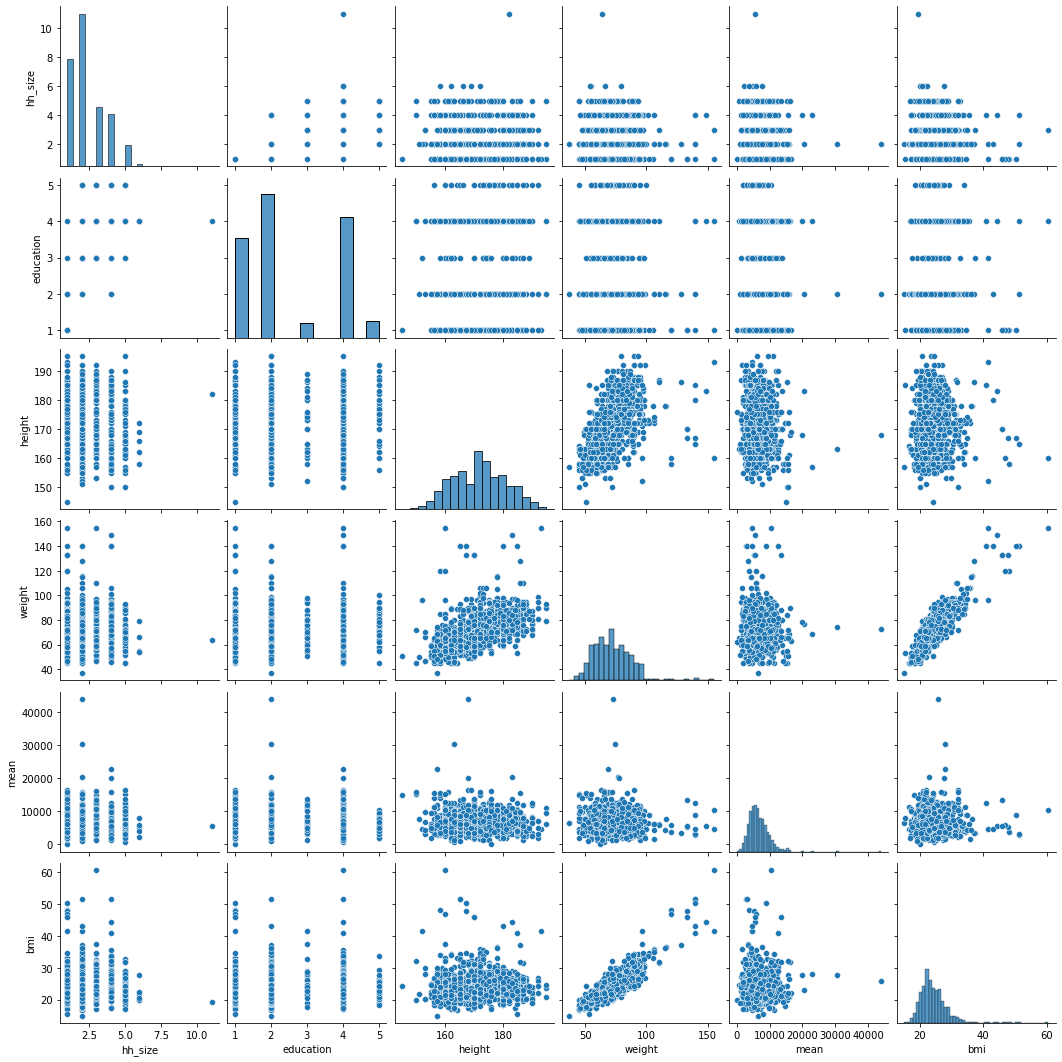

In [289]:
scatterplot = sns.pairplot(df,x_vars=["hh_size", "education", "height", "weight", "mean", "bmi"],
    y_vars=["hh_size", "education", "height", "weight", "mean", "bmi"])
plt.show()

There are a few things to note here:
* All distributions are right-skewed; they have a tail on the right.

In [290]:
corr = df[["hh_size", "education", "height", "weight", "mean", "bmi"]].corr()
corr

,hh_size,education,height,weight,mean,bmi
hh_size,1.000000,0.825294,-0.050285,0.006533,0.027703,0.033498
education,0.825294,1.000000,-0.033299,0.010107,0.006155,0.027219
height,-0.050285,-0.033299,1.000000,0.510239,-0.081542,0.023117
weight,0.006533,0.010107,0.510239,1.000000,-0.054886,0.866640
mean,0.027703,0.006155,-0.081542,-0.054886,1.000000,-0.012879
bmi,0.033498,0.027219,0.023117,0.866640,-0.012879,1.000000


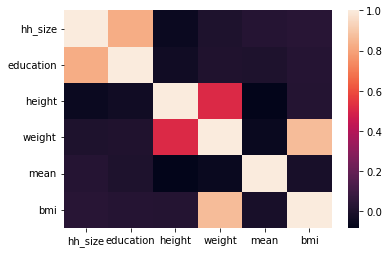

In [291]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

Weak  0.1 < r < 0.3

Moderate 0.3 < r < 0.6

Strong > 0.6

There is a strong correlation between education and household size.
There is a moderate correlation between height and weight.
There is a very weak negative correlation between height and mean number of steps. 

## Predictive model ##

        Explain linear regression in your own words
        Create dummy variables for the categorical variables
        Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).


In [292]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


In [293]:
dmy = pd.get_dummies(df["gender"])
df = pd.concat([df, dmy["Female"]], axis=1)
df = df.drop(["gender"], axis=1)
df.head()

,id,city,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,...,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,bmi,Female
0,1,Bordeaux,25-34,4,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438,0
1,2,Lille,35-44,1,3,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432,0
2,3,Montpellier,25-34,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284,0
3,4,Lyon,<25,1,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337,0
4,5,Montpellier,25-34,3,4,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423,1


In [294]:
dmy = pd.get_dummies(df["city"])
df = pd.concat([df, dmy], axis=1)
df = df.drop(["city", "Montpellier"], axis=1)
df.head()

,id,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,...,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,bmi,Female,Bordeaux,Lille,Lyon
0,1,25-34,4,4,Master or doctorate,178.0,98.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10205.521212,30.930438,0,1,0,0
1,2,35-44,1,3,Bachelor,180.0,77.0,NaN,NaN,10473.0,...,NaN,NaN,NaN,NaN,5687.423313,23.765432,0,0,1,0
2,3,25-34,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,12523.0,...,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284,0,0,0,0
3,4,<25,1,1,Bachelor,178.0,80.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3633.200000,25.249337,0,0,0,1
4,5,25-34,3,4,Bachelor,167.0,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5312.129630,21.872423,1,0,0,0


In [295]:
dmy = pd.get_dummies(df["age"])
df = pd.concat([df, dmy], axis=1)
df = df.drop(["age"], axis=1)
df.head()

,id,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,...,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+,<25
0,1,4,4,Master or doctorate,178.0,98.0,NaN,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,0
1,2,1,3,Bachelor,180.0,77.0,NaN,NaN,10473.0,705.0,...,0,0,1,0,0,1,0,0,0,0
2,3,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,12523.0,2553.0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,Bachelor,178.0,80.0,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
4,5,3,4,Bachelor,167.0,61.0,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0


In [296]:
df = df.drop(["<25"], axis=1)
df.head()

,id,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,...,bmi,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+
0,1,4,4,Master or doctorate,178.0,98.0,NaN,NaN,NaN,NaN,...,30.930438,0,1,0,0,1,0,0,0,0
1,2,1,3,Bachelor,180.0,77.0,NaN,NaN,10473.0,705.0,...,23.765432,0,0,1,0,0,1,0,0,0
2,3,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,12523.0,2553.0,...,25.617284,0,0,0,0,1,0,0,0,0
3,4,1,1,Bachelor,178.0,80.0,NaN,NaN,NaN,NaN,...,25.249337,0,0,0,1,0,0,0,0,0
4,5,3,4,Bachelor,167.0,61.0,NaN,NaN,NaN,NaN,...,21.872423,1,0,0,0,1,0,0,0,0


In [297]:
df = df.drop(["education_1"], axis=1)
df.head()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,bmi,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+
0,1,4,4,178.0,98.0,NaN,NaN,NaN,NaN,3941.0,...,30.930438,0,1,0,0,1,0,0,0,0
1,2,1,3,180.0,77.0,NaN,NaN,10473.0,705.0,4287.0,...,23.765432,0,0,1,0,0,1,0,0,0
2,3,2,2,180.0,83.0,NaN,11428.0,12523.0,2553.0,190.0,...,25.617284,0,0,0,0,1,0,0,0,0
3,4,1,1,178.0,80.0,NaN,NaN,NaN,NaN,NaN,...,25.249337,0,0,0,1,0,0,0,0,0
4,5,3,4,167.0,61.0,NaN,NaN,NaN,NaN,NaN,...,21.872423,1,0,0,0,1,0,0,0,0


In [298]:
df.corr()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,bmi,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+
id,1.000000,-0.014955,-0.001569,0.027294,0.011513,0.260148,-0.017815,-0.054530,-0.040269,0.078418,...,-0.002247,-0.042733,-0.033028,0.020494,-0.017002,-0.049557,0.037284,-0.026856,-0.004770,-0.021554
hh_size,-0.014955,1.000000,0.825294,-0.050285,0.006533,-0.315577,0.107895,0.049611,-0.102563,0.036298,...,0.033498,0.021179,-0.016688,-0.026570,0.139136,-0.220512,0.223430,0.092931,-0.021968,0.047683
education,-0.001569,0.825294,1.000000,-0.033299,0.010107,-0.407267,0.079824,-0.023899,-0.110432,0.008151,...,0.027219,0.002764,-0.029782,0.022843,0.076404,-0.180296,0.164705,0.087086,-0.046785,0.043010
height,0.027294,-0.050285,-0.033299,1.000000,0.510239,-0.063215,-0.217244,-0.178883,0.053494,-0.167427,...,0.023117,-0.711817,0.021420,-0.084584,-0.005966,0.087240,-0.019227,-0.064472,-0.077731,0.018918
weight,0.011513,0.006533,0.010107,0.510239,1.000000,-0.307139,-0.203236,-0.208351,0.036970,-0.182860,...,0.866640,-0.420121,0.050177,-0.064614,-0.018106,-0.032627,0.031879,0.043951,-0.026141,0.005583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-34,-0.049557,-0.220512,-0.180296,0.087240,-0.032627,0.204496,0.017246,-0.078455,-0.065616,-0.105596,...,-0.086551,-0.071037,-0.041267,0.028288,-0.008651,1.000000,-0.445464,-0.402009,-0.212319,-0.081032
35-44,0.037284,0.223430,0.164705,-0.019227,0.031879,-0.299392,0.041212,0.112372,-0.010721,0.114340,...,0.046341,0.029828,-0.031735,-0.024999,0.048065,-0.445464,1.000000,-0.209562,-0.110679,-0.042241
45-54,-0.026856,0.092931,0.087086,-0.064472,0.043951,0.049411,0.021081,0.104345,0.090509,0.031123,...,0.086572,0.077205,0.015544,0.018620,-0.045996,-0.402009,-0.209562,1.000000,-0.099882,-0.038120
55-64,-0.004770,-0.021968,-0.046785,-0.077731,-0.026141,-0.225247,-0.097183,-0.001633,0.130388,0.098224,...,0.016942,0.005539,0.038123,0.001462,-0.029210,-0.212319,-0.110679,-0.099882,1.000000,-0.020133


In [299]:
df = df[['hh_size', 'education', "mean", 'bmi', "Female","Bordeaux", "Lille", "Lyon", "25-34", "35-44", "45-54", "55-64", "65+"]]
df.head()

,hh_size,education,mean,bmi,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+
0,4,4,10205.521212,30.930438,0,1,0,0,1,0,0,0,0
1,1,3,5687.423313,23.765432,0,0,1,0,0,1,0,0,0
2,2,2,8301.729730,25.617284,0,0,0,0,1,0,0,0,0
3,1,1,3633.200000,25.249337,0,0,0,1,0,0,0,0,0
4,3,4,5312.129630,21.872423,1,0,0,0,1,0,0,0,0


In [300]:
df = df.dropna()

In [301]:
y=df["mean"].astype("float64")

In [302]:
X_ = df[['hh_size', 'education', 'bmi', "Female","Bordeaux", "Lille", "Lyon", "25-34", "35-44", "45-54", "55-64", "65+"]].astype("float64")
#X_ = df[['hh_size', 'education', 'bmi', "Female"]].astype("float64")

In [303]:
X_

,hh_size,education,bmi,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+
0,4.0,4.0,30.930438,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,3.0,23.765432,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,2.0,25.617284,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,25.249337,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,4.0,21.872423,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
924,3.0,4.0,21.671258,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
925,3.0,5.0,24.414062,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
926,2.0,2.0,21.672110,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
927,1.0,1.0,21.971336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [304]:
X_.corr()

,hh_size,education,bmi,Female,Bordeaux,Lille,Lyon,25-34,35-44,45-54,55-64,65+
hh_size,1.000000,0.825050,0.033498,0.020090,-0.017177,-0.025502,0.138732,-0.219508,0.223030,0.092483,-0.022257,0.047610
education,0.825050,1.000000,0.027219,0.001547,-0.030331,0.024076,0.075912,-0.179139,0.164225,0.086595,-0.047122,0.042930
bmi,0.033498,0.027219,1.000000,-0.083940,0.045362,-0.026241,-0.016644,-0.086551,0.046341,0.086572,0.016942,-0.005083
Female,0.020090,0.001547,-0.083940,1.000000,-0.027059,0.070013,-0.001674,-0.070013,0.029355,0.076806,0.005307,-0.056939
Bordeaux,-0.017177,-0.030331,0.045362,-0.027059,1.000000,-0.434245,-0.171625,-0.040824,-0.031952,0.015357,0.038027,0.109927
Lille,-0.025502,0.024076,-0.026241,0.070013,-0.434245,1.000000,-0.463596,0.027230,-0.024529,0.019068,0.001694,-0.019574
Lyon,0.138732,0.075912,-0.016644,-0.001674,-0.171625,-0.463596,1.000000,-0.008152,0.047851,-0.046208,-0.029321,-0.037542
25-34,-0.219508,-0.179139,-0.086551,-0.070013,-0.040824,0.027230,-0.008152,1.000000,-0.445236,-0.401793,-0.212189,-0.080981
35-44,0.223030,0.164225,0.046341,0.029355,-0.031952,-0.024529,0.047851,-0.445236,1.000000,-0.209839,-0.110817,-0.042293
45-54,0.092483,0.086595,0.086572,0.076806,0.015357,0.019068,-0.046208,-0.401793,-0.209839,1.000000,-0.100004,-0.038166


## Evaluating the model ##

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression #remember, this is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
X_train, X_test,y_train,y_test=train_test_split(X_,y, test_size=0.30,random_state=42)

In [306]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [307]:
coef = pd.DataFrame(X_.columns.values, lm.coef_)
coef

,0
133.821972,hh_size
-116.257837,education
-15.127898,bmi
198.949451,Female
-137.142642,Bordeaux
1331.390642,Lille
835.274537,Lyon
452.540554,25-34
867.192508,35-44
1275.487103,45-54


In [308]:
y_test_p = lm.predict(X_test)

In [309]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_score(y_test,y_test_p)

-0.022993162420809732

The variation we can explain: 2%
This model is very inaccurate

In [310]:
import math
math.sqrt(mean_squared_error(y_test, y_test_p))

3116.028068131018

/Users/anjavolkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean'>

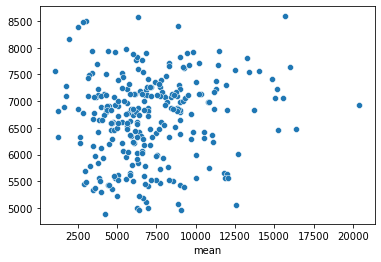

In [311]:
sns.scatterplot(y_test, y_test_p)

The predictive power of the model is basically nonexistent. 